In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [2]:

import unbiasedSetHelper as ush


# first argument are the images
# second one is the jitter level
# third one is to wheter or not to sharp the edges (the standard MNIST has unsharp edges, but
# as far as I know we operate with images which consists of only two colors, black and some other color)
testSet = ush.generateUnbiasedTestSet(test_data.data, 0.05, True)

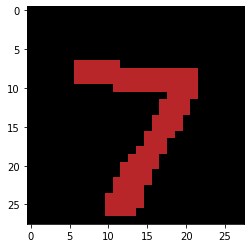

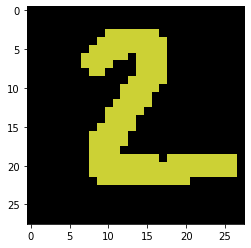

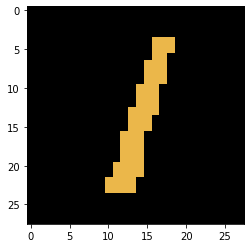

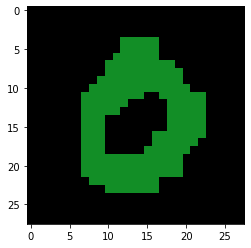

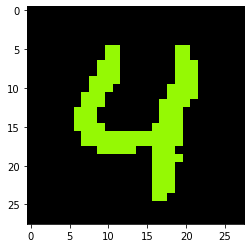

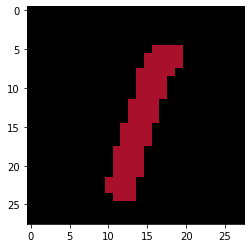

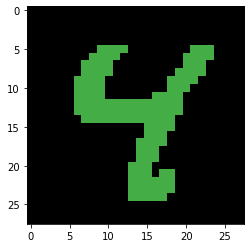

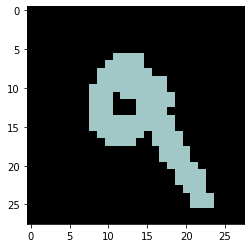

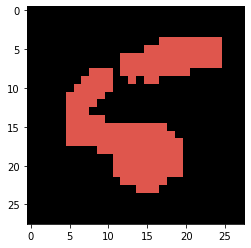

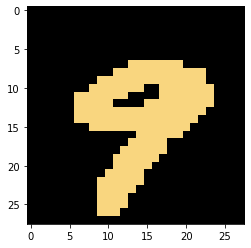

In [5]:

for i in range(10):
    plt.imshow(testSet[i])
    plt.show()    

(10000, 28, 28, 3)


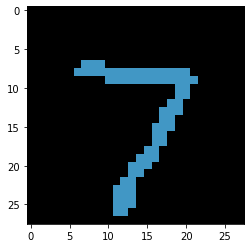

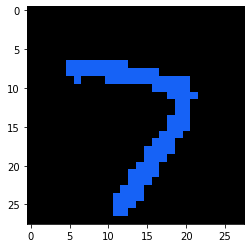

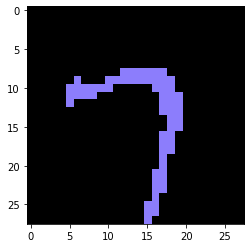

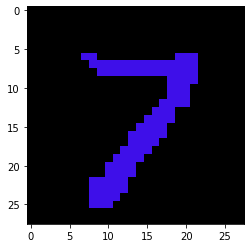

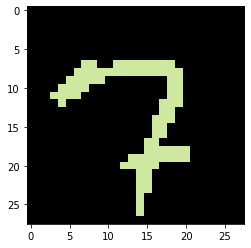

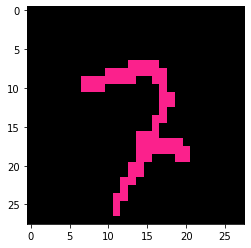

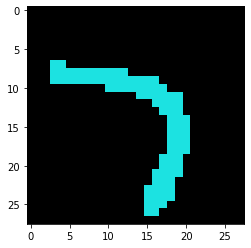

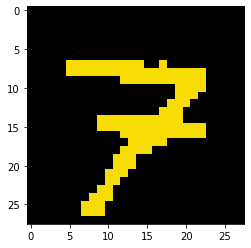

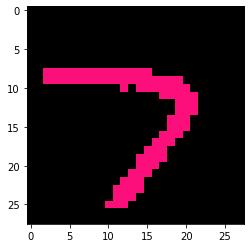

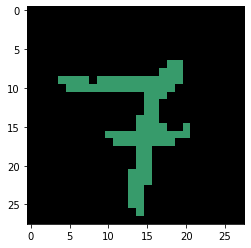

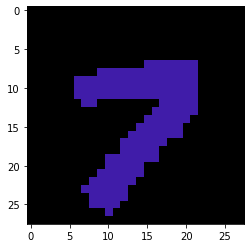

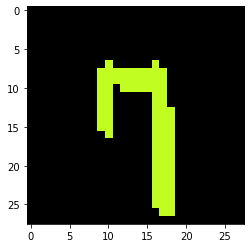

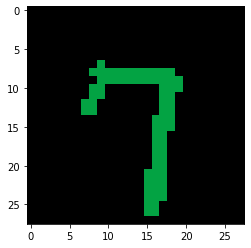

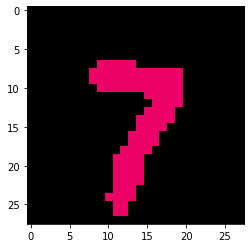

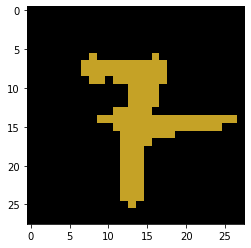

In [7]:
# easier way to get an unbiased test set
# Note that they definitly applied some other threshold when they colorized the images

testset = np.load("mnist_10color_jitter_var_0.050.npy", encoding='latin1', allow_pickle=True).item() #

print(np.shape(testset['test_image']))

i = 0
for image in testset['test_image']:
    if testset['test_label'][i] == 7:
        plt.imshow(image)
        plt.show()
    i += 1
    if i == 100:
        break